<a href="https://colab.research.google.com/github/David-Smirnoff/clustering/blob/main/beca/%C3%ADndice_espectro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.9/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


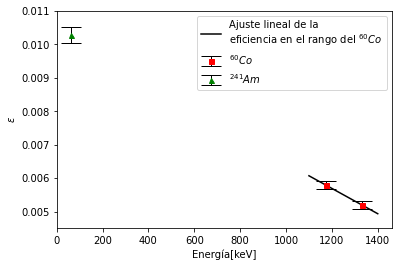

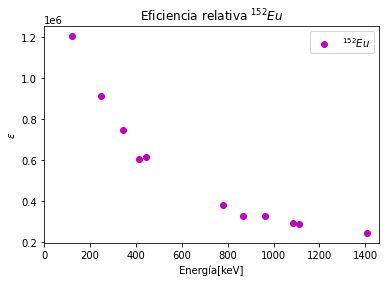

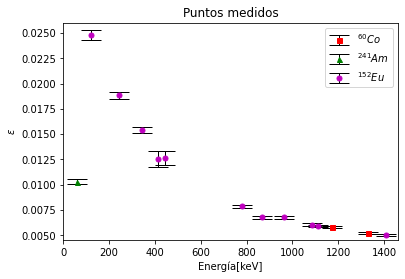

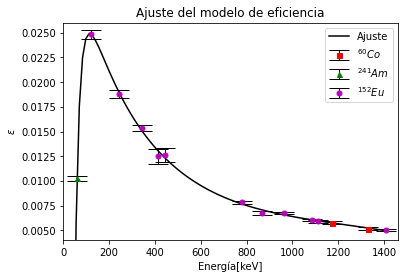

[-1.90957006e+01  1.89960286e+01 -7.86918539e+00  1.74146249e+00
 -2.17173681e-01  1.44606778e-02 -4.01266712e-04]


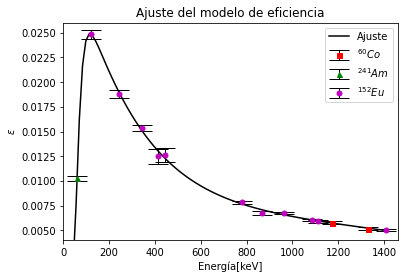

[-1.96981304e+03  2.03201084e+03 -8.72786947e+02  1.99364721e+02
 -2.55294993e+01  1.73649135e+00 -4.89914625e-02]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
#import pandas as pd

# datos 60Co
Energias_co = np.array([1172.81,1331.87])
lambda_dec_co = 4.16606e-9
gammas_co = np.array([0.9985,0.999826])
n_cuentas_co = np.array([5789,5195])
a_0_co = 58.37*60
t_dec_co = 357264000
t_vivo_co = 1265.46
delta_lam_co = 0.0003e-9
delta_gammas_co = np.array([0.0003,0.000006])
delta_n_cuen_co = np.array([80,73])
delta_a_0_co = a_0_co*np.sqrt((1/60)**2+(0.01/58.37)**2)
delta_t_dec_co = 86400
delta_t_vivo_co = 0.01
delta_E = [0.5,0.5]

# datos 152Eu
Energias_eu = np.array([122.96,245.69,345.08,411.83,444.65,779.14,867.49,964.01,1085.62,1111.85,1407.42])
lambda_dec_eu = 1.6246e-9
gammas_eu = np.array([0.2853,0.0755,0.2659,0.02237,0.02827,0.1293,0.0423,0.1451,0.1011,0.1367,0.2087])
n_cuentas_eu = np.array([343728,68959,198459,13567,17340,49286,13889,47679,29699,39220,50655])
#a_0_eu = 1
#t_dec_eu = 1
t_vivo_eu = 17825
delta_lam_eu = 0.001e-9
delta_gammas_eu = np.array([16,4,20,13,14,8,3,7,5,8,9])/10000
delta_n_cuen_eu = np.array([621,301,465,189,158,313,181,336,199,219,228])
#delta_a_0_eu = a_0_eu*np.sqrt((1/60)**2+(0.01/58.37)**2)
#delta_t_dec_eu = 86400
delta_t_vivo_eu = 0.01

# datos 241Am
Energias_am = np.array([60.83])
lambda_dec_am = 5.076e-11
gammas_am = np.array([0.359]) 
n_cuentas_am = np.array([10230])
a_0_am = 263.54*60
t_dec_am = 295056000
t_vivo_am = 178
delta_lam_am = 0.0007e-11
delta_gammas_am = np.array([0.004])
delta_n_cuen_am = np.array([129])
delta_a_0_am = a_0_am*np.sqrt((1/60)**2+(0.01/263.54)**2)
delta_t_dec_am = 86400
delta_t_vivo_am = 0.01

# función eficiencia
def eff(lambda_d,gamma,n,a_0,t_d,t_vivo):
    denom = a_0*np.exp(-lambda_d*t_d)*gamma
    return n*lambda_d/(1-np.exp(-lambda_d*t_vivo))*denom**(-1)

# función error
def delta_eff(eff,lambda_d,gamma,n,a_0,t_d,t_vivo,delta_lambda_d,delta_gamma,delta_n,delta_a_0,delta_t_d,delta_t_vivo):
    return eff*np.sqrt((delta_lambda_d/lambda_d)**2+(delta_gamma/gamma)**2+(delta_n/n)**2+(delta_a_0/a_0)**2+(delta_t_d/t_d)**2+(delta_t_vivo/t_vivo)**2)

# ajuste para obtener la eficiencia absoluta del 152Eu
def modelo(x,a,b):
    return a*x+b

# eficiencia relativa
def eff_rel(gamma,n):
    return n/gamma

# error en la eficiencia absoluta obtenida a partir de la relativa
def delta_eff_rel_k(eff_rel, n, k, gamma, delta_n, delta_gamma, delta_k):
    return eff_rel*k*np.sqrt((delta_n/n)**2+(delta_gamma/gamma)**2+(delta_k/k)**2)

# ajuste para obtener la eficiencia absoluta del 152Eu
ppot, pcov = sc.optimize.curve_fit(modelo,Energias_co,eff(lambda_dec_co,gammas_co,n_cuentas_co,a_0_co,t_dec_co,t_vivo_co))

# eficiencias parciales
plt.errorbar(Energias_co, eff(lambda_dec_co,gammas_co,n_cuentas_co,a_0_co,t_dec_co,t_vivo_co),  yerr=delta_eff(eff(lambda_dec_co,gammas_co,n_cuentas_co,a_0_co,t_dec_co,t_vivo_co),lambda_dec_co,gammas_co,n_cuentas_co,a_0_co,t_dec_co,t_vivo_co,delta_lam_co,delta_gammas_co,delta_n_cuen_co,delta_a_0_co,delta_t_dec_co,delta_t_vivo_co), fmt = 'rs', ms=5, ecolor='k', elinewidth = 1, capsize = 10, capthick = 1, label='$^{60}Co$')
plt.errorbar(Energias_am, eff(lambda_dec_am,gammas_am,n_cuentas_am,a_0_am,t_dec_am,t_vivo_am),  yerr=delta_eff(eff(lambda_dec_am,gammas_am,n_cuentas_am,a_0_am,t_dec_am,t_vivo_am),lambda_dec_am,gammas_am,n_cuentas_am,a_0_am,t_dec_am,t_vivo_am,delta_lam_am,delta_gammas_am,delta_n_cuen_am,delta_a_0_am,delta_t_dec_am,delta_t_vivo_am), fmt = 'g^', ms=5, ecolor='k', elinewidth = 1, capsize = 10, capthick = 1, label='$^{241}Am$')
plt.plot(np.linspace(1100,1400,100),modelo(np.linspace(1100,1400,100),ppot[0],ppot[1]), c='k', label='Ajuste lineal de la\neficiencia en el rango del $^{60}Co$')
plt.xlabel('Energía[keV]')
plt.ylabel('$\epsilon$')
plt.xlim(0,1460)
plt.ylim(0.0045,0.011)
plt.legend()
plt.show()

# eficiencias relativas Eu
plt.scatter(Energias_eu,eff_rel(gammas_eu,n_cuentas_eu), color='m', marker='o', label='$^{152}Eu$')
plt.xlabel('Energía[keV]')
plt.ylabel('$\epsilon$')
plt.title('Eficiencia relativa $^{152}Eu$')
plt.xlim(0,1460)
plt.legend()
plt.show()

# obtención eficiencia absoluta Eu
eff_rel_eu = eff_rel(gammas_eu[-2:],n_cuentas_eu[-2:])
k = modelo(Energias_eu[-2:],ppot[0],ppot[1])/eff_rel_eu
delta_k = np.std(k)
k= np.mean(k)

# plotear curva eficiencias
plt.errorbar(Energias_co, eff(lambda_dec_co,gammas_co,n_cuentas_co,a_0_co,t_dec_co,t_vivo_co),  yerr=delta_eff(eff(lambda_dec_co,gammas_co,n_cuentas_co,a_0_co,t_dec_co,t_vivo_co),lambda_dec_co,gammas_co,n_cuentas_co,a_0_co,t_dec_co,t_vivo_co,delta_lam_co,delta_gammas_co,delta_n_cuen_co,delta_a_0_co,delta_t_dec_co,delta_t_vivo_co), fmt = 'rs', ms=5, ecolor='k', elinewidth = 1, capsize = 10, capthick = 1, label='$^{60}Co$')
plt.errorbar(Energias_am, eff(lambda_dec_am,gammas_am,n_cuentas_am,a_0_am,t_dec_am,t_vivo_am),  yerr=delta_eff(eff(lambda_dec_am,gammas_am,n_cuentas_am,a_0_am,t_dec_am,t_vivo_am),lambda_dec_am,gammas_am,n_cuentas_am,a_0_am,t_dec_am,t_vivo_am,delta_lam_am,delta_gammas_am,delta_n_cuen_am,delta_a_0_am,delta_t_dec_am,delta_t_vivo_am), fmt = 'g^', ms=5, ecolor='k', elinewidth = 1, capsize = 10, capthick = 1, label='$^{241}Am$')
plt.errorbar(Energias_eu, k*eff_rel(gammas_eu,n_cuentas_eu),  yerr=delta_eff_rel_k(eff_rel(gammas_eu,n_cuentas_eu), n_cuentas_eu, k, gammas_eu, delta_n_cuen_eu, delta_gammas_eu, delta_k), fmt = 'mo', ms=5, ecolor='k', elinewidth = 1, capsize = 10, capthick = 1, label='$^{152}Eu$')
plt.xlabel('Energía[keV]')
plt.ylabel('$\epsilon$')
plt.xlim(0,1460)
plt.ylim(0.0045,0.026)
plt.legend()
plt.title('Puntos medidos')
plt.show()

# modelo
def modelo_ln(E,a_0,a_1,a_2,a_3,a_4,a_5,a_6):
    return a_0+a_1*np.log(E)+a_2*np.log(E)**2+a_3*np.log(E)**3+a_4*np.log(E)**4+a_5*np.log(E)**5+a_6*np.log(E)**6

Energias = np.array(list(Energias_am) + list(Energias_eu) + list(Energias_co))
Eficiencias = np.array(list(eff(lambda_dec_am,gammas_am,n_cuentas_am,a_0_am,t_dec_am,t_vivo_am))+list(k*eff_rel(gammas_eu,n_cuentas_eu))+list(eff(lambda_dec_co,gammas_co,n_cuentas_co,a_0_co,t_dec_co,t_vivo_co)))
ppot_2, p_cov2 = sc.optimize.curve_fit(modelo_ln, Energias, Eficiencias)

# plot modelo mal
plt.errorbar(Energias_co, eff(lambda_dec_co,gammas_co,n_cuentas_co,a_0_co,t_dec_co,t_vivo_co),  yerr=delta_eff(eff(lambda_dec_co,gammas_co,n_cuentas_co,a_0_co,t_dec_co,t_vivo_co),lambda_dec_co,gammas_co,n_cuentas_co,a_0_co,t_dec_co,t_vivo_co,delta_lam_co,delta_gammas_co,delta_n_cuen_co,delta_a_0_co,delta_t_dec_co,delta_t_vivo_co), fmt = 'rs', ms=5, ecolor='k', elinewidth = 1, capsize = 10, capthick = 1, label='$^{60}Co$')
plt.errorbar(Energias_am, eff(lambda_dec_am,gammas_am,n_cuentas_am,a_0_am,t_dec_am,t_vivo_am),  yerr=delta_eff(eff(lambda_dec_am,gammas_am,n_cuentas_am,a_0_am,t_dec_am,t_vivo_am),lambda_dec_am,gammas_am,n_cuentas_am,a_0_am,t_dec_am,t_vivo_am,delta_lam_am,delta_gammas_am,delta_n_cuen_am,delta_a_0_am,delta_t_dec_am,delta_t_vivo_am), fmt = 'g^', ms=5, ecolor='k', elinewidth = 1, capsize = 10, capthick = 1, label='$^{241}Am$')
plt.errorbar(Energias_eu, k*eff_rel(gammas_eu,n_cuentas_eu),  yerr=delta_eff_rel_k(eff_rel(gammas_eu,n_cuentas_eu), n_cuentas_eu, k, gammas_eu, delta_n_cuen_eu, delta_gammas_eu, delta_k), fmt = 'mo', ms=5, ecolor='k', elinewidth = 1, capsize = 10, capthick = 1, label='$^{152}Eu$')
plt.plot(np.linspace(0.1,1400,100),modelo_ln(np.linspace(0.1,1400,100),ppot_2[0],ppot_2[1],ppot_2[2],ppot_2[3],ppot_2[4],ppot_2[5],ppot_2[6]), color='k', label='Ajuste')
plt.xlabel('Energía[keV]')
plt.ylabel('$\epsilon$')
plt.xlim(0,1460)
plt.ylim(0.004,0.026)
plt.legend()
plt.title('Ajuste del modelo de eficiencia')
plt.show()
print(ppot_2)

# ajuste modelo ln-ln
ppot_3, p_cov3 = sc.optimize.curve_fit(modelo_ln, Energias, np.log(Eficiencias))

# plot modelo bien
plt.errorbar(Energias_co, eff(lambda_dec_co,gammas_co,n_cuentas_co,a_0_co,t_dec_co,t_vivo_co),  yerr=delta_eff(eff(lambda_dec_co,gammas_co,n_cuentas_co,a_0_co,t_dec_co,t_vivo_co),lambda_dec_co,gammas_co,n_cuentas_co,a_0_co,t_dec_co,t_vivo_co,delta_lam_co,delta_gammas_co,delta_n_cuen_co,delta_a_0_co,delta_t_dec_co,delta_t_vivo_co), fmt = 'rs', ms=5, ecolor='k', elinewidth = 1, capsize = 10, capthick = 1, label='$^{60}Co$')
plt.errorbar(Energias_am, eff(lambda_dec_am,gammas_am,n_cuentas_am,a_0_am,t_dec_am,t_vivo_am),  yerr=delta_eff(eff(lambda_dec_am,gammas_am,n_cuentas_am,a_0_am,t_dec_am,t_vivo_am),lambda_dec_am,gammas_am,n_cuentas_am,a_0_am,t_dec_am,t_vivo_am,delta_lam_am,delta_gammas_am,delta_n_cuen_am,delta_a_0_am,delta_t_dec_am,delta_t_vivo_am), fmt = 'g^', ms=5, ecolor='k', elinewidth = 1, capsize = 10, capthick = 1, label='$^{241}Am$')
plt.errorbar(Energias_eu, k*eff_rel(gammas_eu,n_cuentas_eu),  yerr=delta_eff_rel_k(eff_rel(gammas_eu,n_cuentas_eu), n_cuentas_eu, k, gammas_eu, delta_n_cuen_eu, delta_gammas_eu, delta_k), fmt = 'mo', ms=5, ecolor='k', elinewidth = 1, capsize = 10, capthick = 1, label='$^{152}Eu$')
plt.plot(np.linspace(0.1,1400,100),np.exp(modelo_ln(np.linspace(0.1,1400,100),ppot_3[0],ppot_3[1],ppot_3[2],ppot_3[3],ppot_3[4],ppot_3[5],ppot_3[6])), color='k', label='Ajuste')
plt.xlabel('Energía[keV]')
plt.ylabel('$\epsilon$')
plt.xlim(0,1460)
plt.ylim(0.004,0.026)
plt.legend()
plt.title('Ajuste del modelo de eficiencia')
plt.show()
print(ppot_3)